In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from ycimpute.imputer import knnimput
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

In [2]:
df = pd.read_csv("./src/HousePrice_Data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,NaN,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,NaN,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530.0,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310.0,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020.0,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600.0,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287


In [23]:
df.drop(['date','id'], axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,NaN,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,NaN,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509
21609,400000.0,4,2.50,2310.0,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200
21610,402101.0,2,0.75,1020.0,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007
21611,400000.0,3,2.50,1600.0,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287


# Data preperation

### Variable Transformation

In [3]:
# there is not any categorical variable
# df['column_name'] = LabelEncoder().fit_transform(df["column_name"])

In [24]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,NaN,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,NaN,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503


### Missing Data

In [25]:
df[df.isnull().any(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,604000.0,4,3.00,NaN,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,NaN,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503
77,480000.0,3,1.00,NaN,5060,1.0,0,0,3,7,1040,0,1941,0,98116,47.5636,-122.394,890.0,5060
83,356000.0,3,1.50,NaN,8712,1.0,0,0,3,8,1680,0,1964,0,98059,47.4811,-122.149,1850.0,8797
175,425000.0,3,2.50,NaN,1100,2.0,0,0,3,8,820,300,2008,0,98122,47.6106,-122.310,1590.0,1795
249,481000.0,3,1.75,NaN,3000,1.0,0,0,4,6,770,790,1918,0,98103,47.6846,-122.345,1390.0,3000
285,370000.0,4,2.50,NaN,8666,2.0,0,0,3,9,2720,0,1992,0,98030,47.3846,-122.169,2410.0,8100
8338,500000.0,3,1.75,2420.0,65501,2.0,0,1,3,8,2420,0,1984,0,98074,47.6525,-122.087,NaN,19036
18247,270000.0,3,2.25,1810.0,8262,2.0,0,0,4,8,1810,0,1981,0,98023,47.2994,-122.370,NaN,8262
18302,3300000.0,5,6.25,8020.0,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,NaN,18969


<Axes: >

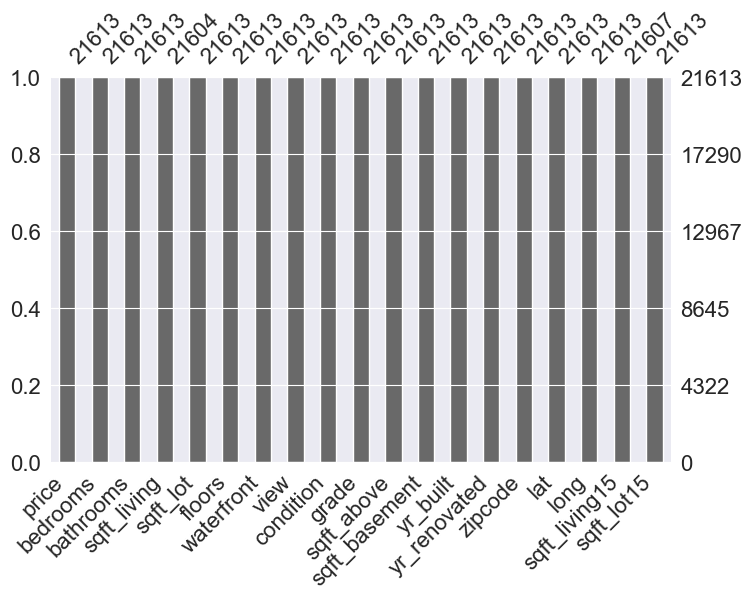

In [26]:
msno.bar(df, figsize=[8, 5])

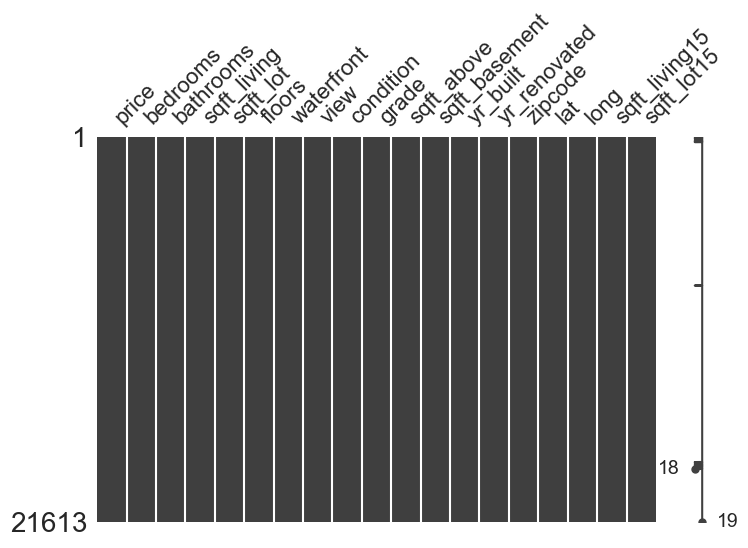

In [27]:
msno.matrix(df, figsize=[8, 5]);

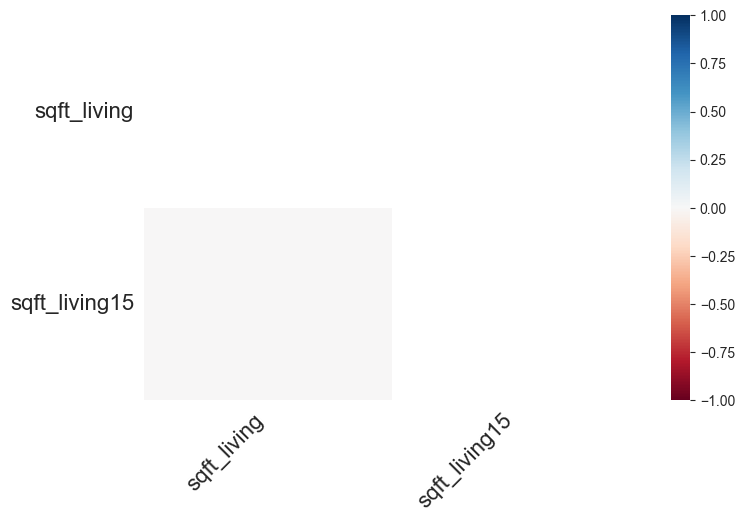

In [28]:
msno.heatmap(df, figsize=[8, 5]);

In [29]:
df['sqft_living15'] = df['sqft_living15'].fillna(df['sqft_living15'].mean())

In [30]:
var_column_names = list(df)
df = pd.DataFrame(knnimput.KNN(k=5).complete(np.array(df)), columns=var_column_names)

Imputing row 1/21613 with 0 missing, elapsed time: 73.346
Imputing row 101/21613 with 0 missing, elapsed time: 73.379
Imputing row 201/21613 with 0 missing, elapsed time: 73.380
Imputing row 301/21613 with 0 missing, elapsed time: 73.382
Imputing row 401/21613 with 0 missing, elapsed time: 73.382
Imputing row 501/21613 with 0 missing, elapsed time: 73.382
Imputing row 601/21613 with 0 missing, elapsed time: 73.382
Imputing row 701/21613 with 0 missing, elapsed time: 73.382
Imputing row 801/21613 with 0 missing, elapsed time: 73.382
Imputing row 901/21613 with 0 missing, elapsed time: 73.383
Imputing row 1001/21613 with 0 missing, elapsed time: 73.383
Imputing row 1101/21613 with 0 missing, elapsed time: 73.383
Imputing row 1201/21613 with 0 missing, elapsed time: 73.383
Imputing row 1301/21613 with 0 missing, elapsed time: 73.383
Imputing row 1401/21613 with 0 missing, elapsed time: 73.384
Imputing row 1501/21613 with 0 missing, elapsed time: 73.384
Imputing row 1601/21613 with 0 missi

In [31]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Outliers

In [32]:
df_sqr = df['sqft_living']
df_sqr

0        1180.000000
1        2570.000000
2         770.000000
3        2090.976178
4        1490.210641
            ...     
21608    1530.000000
21609    2310.000000
21610    1020.000000
21611    1600.000000
21612    1020.000000
Name: sqft_living, Length: 21613, dtype: float64

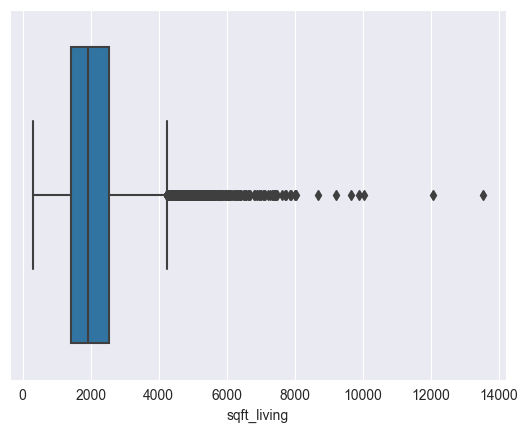

In [34]:
sns.boxplot(x=df_sqr);

In [35]:
Q1 = df_sqr.quantile(0.25)
Q3 = df_sqr.quantile(0.75)
IQR = Q3 - Q1

In [36]:
fence_low = Q1 - 1.5 * IQR
fence_high = Q3 + 1.5 * IQR

In [37]:
no_outlier_boolean = ((df_sqr > fence_low) | (df_sqr < fence_high))
outlier_boolean = ((df_sqr < fence_low) | (df_sqr > fence_high))

In [38]:
df[outlier_boolean]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
70,1040000.0,5.0,3.25,4770.0,50094.0,1.0,0.0,0.0,4.0,11.0,3070.0,1700.0,1973.0,0.0,98005.0,47.6525,-122.160,3530.0,38917.0
115,740500.0,3.0,3.50,4380.0,6350.0,2.0,0.0,0.0,3.0,8.0,2780.0,1600.0,1900.0,1999.0,98117.0,47.6981,-122.368,1830.0,6350.0
153,2250000.0,4.0,3.25,5180.0,19850.0,2.0,0.0,3.0,3.0,12.0,3540.0,1640.0,2006.0,0.0,98006.0,47.5620,-122.162,3160.0,9750.0
239,472000.0,6.0,2.50,4410.0,14034.0,1.0,0.0,2.0,4.0,9.0,2350.0,2060.0,1965.0,0.0,98003.0,47.3376,-122.324,2600.0,13988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,1375000.0,5.0,4.50,4350.0,13405.0,2.0,0.0,0.0,3.0,11.0,4350.0,0.0,2014.0,0.0,98074.0,47.6018,-122.060,3990.0,7208.0
21561,750000.0,5.0,4.00,4500.0,8130.0,2.0,0.0,0.0,3.0,10.0,4500.0,0.0,2007.0,0.0,98059.0,47.4832,-122.145,2840.0,8402.0
21576,3567000.0,5.0,4.50,4850.0,10584.0,2.0,1.0,4.0,3.0,10.0,3540.0,1310.0,2007.0,0.0,98008.0,47.5943,-122.110,3470.0,18270.0
21590,1222500.0,4.0,3.50,4910.0,9444.0,1.5,0.0,0.0,3.0,11.0,3110.0,1800.0,2007.0,0.0,98074.0,47.6502,-122.066,4560.0,11063.0


In [39]:
df_copy = df.copy()

In [40]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df_copy)

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
df_scores = clf.negative_outlier_factor_
np.sort(df_scores[:])

array([-6.47514135, -5.44163071, -5.31647868, ..., -0.94208428,
       -0.94131226, -0.9389302 ])

In [42]:
tolerance = np.sort(df_scores[:])[10]

In [43]:
outlier_boolean = df_scores < tolerance
no_outlier_boolean = df_scores > tolerance

In [44]:
no_outlier_set = df[no_outlier_boolean]
outlier_set = df[outlier_boolean]

In [45]:
outlier_set

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,7062500.0,5.0,4.50,10040.0,37325.0,2.0,1.0,2.0,3.0,11.0,7680.0,2360.0,1940.0,2001.0,98004.0,47.6500,-122.214,3930.0,25449.0
6501,1940000.0,4.0,5.75,7220.0,223462.0,2.0,0.0,4.0,3.0,12.0,6220.0,1000.0,2000.0,0.0,98053.0,47.7097,-122.013,2680.0,7593.0
7252,7700000.0,6.0,8.00,12050.0,27600.0,2.5,0.0,3.0,4.0,13.0,8570.0,3480.0,1910.0,1987.0,98102.0,47.6298,-122.323,3940.0,8800.0
8443,2140000.0,4.0,3.75,5150.0,453895.0,2.0,0.0,3.0,3.0,11.0,4360.0,790.0,1997.0,0.0,98053.0,47.6795,-121.991,2500.0,215186.0
9253,1680000.0,4.0,4.25,5584.0,68257.0,2.0,0.0,0.0,3.0,11.0,5584.0,0.0,1998.0,0.0,98014.0,47.6113,-121.952,5030.0,101901.0
9254,6885000.0,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0
11871,1950000.0,4.0,3.25,7420.0,167869.0,2.0,0.0,3.0,3.0,12.0,7420.0,0.0,2002.0,0.0,98045.0,47.4548,-121.764,5610.0,169549.0
12777,2280000.0,7.0,8.00,13540.0,307752.0,3.0,0.0,4.0,3.0,12.0,9410.0,4130.0,1999.0,0.0,98053.0,47.6675,-121.986,4850.0,217800.0
15166,1755000.0,4.0,4.00,3860.0,67953.0,2.0,0.0,2.0,4.0,12.0,3860.0,0.0,1927.0,0.0,98177.0,47.7469,-122.378,4410.0,128066.0
16773,1920000.0,5.0,5.75,7730.0,230868.0,2.0,0.0,0.0,3.0,12.0,6660.0,1070.0,2004.0,0.0,98077.0,47.7615,-122.084,2660.0,39292.0


In [46]:
no_outlier_set

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.000000,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.000000,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.000000,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,2090.976178,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1490.210641,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.000000,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.000000,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.000000,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.000000,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [47]:
df = no_outlier_set

In [48]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.000000,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.000000,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.000000,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,2090.976178,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1490.210641,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.000000,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.000000,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.000000,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.000000,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


### Standardization

In [49]:
pd.DataFrame(preprocessing.scale(df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.885641,-0.39826,-1.453458,-0.989354,-0.227842,-0.915079,-0.086925,-0.305193,-0.629281,-0.558848,-0.738992,-0.659853,-0.544844,-0.209944,1.869911,-0.352197,-0.305708,-0.944308,-0.260215
1,-0.002017,-0.39826,0.178553,0.543575,-0.189207,0.937201,-0.086925,-0.305193,-0.629281,-0.558848,0.468117,0.247112,-0.681037,4.750837,0.879350,1.161873,-0.746150,-0.432165,-0.187071
2,-1.002768,-1.47420,-1.453458,-1.441513,-0.122277,-0.915079,-0.086925,-0.305193,-0.629281,-1.412069,-1.238906,-0.659853,-1.293901,-0.209944,-0.933562,1.283836,-0.135215,1.075000,-0.171515
3,0.182479,0.67768,1.157759,0.015295,-0.243616,-0.915079,-0.086925,-0.305193,2.443788,-0.558848,-0.897502,1.403493,-0.204364,-0.209944,1.084938,-0.282916,-1.271839,-0.915042,-0.284119
4,-0.080288,-0.39826,-0.147849,-0.647246,-0.168871,-0.915079,-0.086925,-0.305193,-0.629281,0.294374,-0.129341,-0.659853,0.544693,-0.209944,-0.073830,0.409890,1.200319,-0.271205,-0.192072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,-0.499597,-0.39826,0.504955,-0.603365,-0.337507,2.789482,-0.086925,-0.305193,-0.629281,0.294374,-0.312236,-0.659853,1.293750,-0.209944,0.468175,1.005270,-0.937956,-0.666287,-0.412498
21598,-0.387781,0.67768,0.504955,0.256840,-0.223886,0.937201,-0.086925,-0.305193,-0.629281,0.294374,0.638820,-0.659853,1.463990,-0.209944,1.271837,-0.355805,-1.051618,-0.227307,-0.203215
21599,-0.381908,-1.47420,-1.779860,-1.165806,-0.332193,0.937201,-0.086925,-0.305193,-0.629281,-0.558848,-0.934081,-0.659853,1.293750,-0.209944,1.234457,0.248235,-0.604072,-1.412553,-0.394184
21600,-0.387781,-0.39826,0.504955,-0.526167,-0.307003,0.937201,-0.086925,-0.305193,-0.629281,0.294374,-0.226885,-0.659853,1.123510,-0.209944,-0.952251,-0.184047,1.029826,-0.841879,-0.420662


### Save as processed_home_prices

In [50]:
df.to_csv("processed_home_prices", sep=',', index=False, encoding='utf-8')